In [1]:
import cv2 
import matplotlib.pyplot as plt

from pipeline import classify, region_proposal_MSER
from vis import visualize_predictions

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Visualize Region Proposals from MSER

Run the cell below to visualize the region proposals output from MSER. The regions will be annotated on the image with red bounding boxes. These regions will be classified in the next cell.

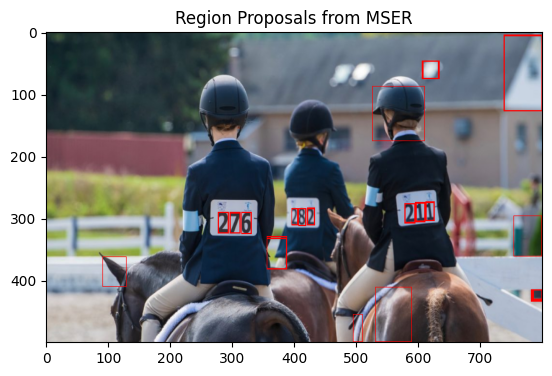

In [2]:
IMAGE_PATH = 'example_images/horse_show.jpeg'
img = cv2.imread(IMAGE_PATH)
img = cv2.resize(img, (800,500))
bboxes = region_proposal_MSER(img)
for box in bboxes:
    x, y, w, h = box
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255), 1)
plt.title('Region Proposals from MSER')
plt.imshow(img[:,:,::-1]);

### Classify Regions with a CNN

Run the cell below to run the classifier on the regions obtained in the cell above.
Specify the model with a string. Accepted models are `vgg`, `vgg_imagenet` and `cnn`. `vgg_imagenet` will have the best performance.

To adjust the confidence threshold, set the `confidence` in `classify()` to a number between 0. and 1.

The scores for each classified region are displayed on the plot. For images with dense digits, it can be difficult to visualize with the scores annotated. Set `display_score` to `False` to disable the scores.

Many of the regions shown in the output above may disappear after the classifier is run! Regions that do not contain a digits are generally filtered out by the model classifying it as background or by the confidence threshold. Closely overlapping boxes around the same region are filtered by Non-Maximum Suppression.

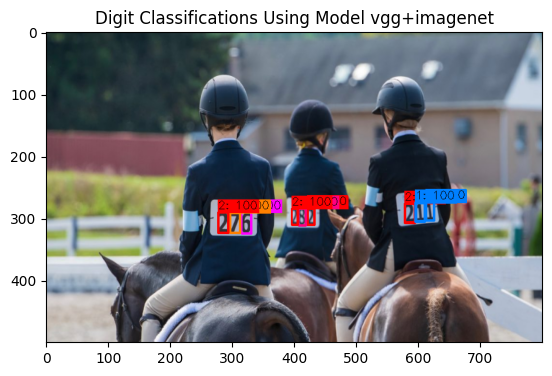

In [5]:
MODEL = 'vgg+imagenet' # 'cnn', 'vgg'
img = cv2.imread(IMAGE_PATH)
img = cv2.resize(img, (800,500))
predictions = classify(img, bboxes, confidence=0.99, architecture=MODEL)
plt.title(f'Digit Classifications Using Model {MODEL}')
visualize_predictions(img, predictions, visualize=True, display_score=True)